# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для того, чтобы зафиксировать "случайные" значения, генерируемые алгоритмами библиотеки random - это позволяет разным людям получать одни и те же случайно сгенерированные значения для того, чтобы легче было проверять домашки :)`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# 1. Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(n=10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
# 2. Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
# 2. Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
# 3. (Тренировочный датасет) Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print(df_train.isna().sum())
na_cols_train = [col for col in df_train.columns if df_train[col].isnull().any()]

print('Пропуски в train:', na_cols_train)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
Пропуски в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [7]:
# 3. (Тестовый датасет) Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print(df_test.isna().sum())
na_cols_test = [col for col in df_test.columns if df_test[col].isnull().any()]

print('Пропуски в train:', na_cols_test)

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64
Пропуски в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [8]:
# 4. (Тренировочный датасет) Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
df_train.duplicated().sum()

985

In [9]:
# 4. (Тестовый датасет) Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
df_test.duplicated().sum()

62

In [10]:
# БОНУС Постройте дашборд, используя ydata-profilling(0.15 балла)
from ydata_profiling import ProfileReport

# Пример дашборда (train)
ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Сохранение дашборда для train и test
report_train = ProfileReport(df_train)
report_train.to_file('report_train.html')

report_test = ProfileReport(df_test)
report_test.to_file('report_test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
na_cols_train

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [13]:
medians = df_train[na_cols_test].median(numeric_only=True)

In [14]:
medians

seats    5.0
dtype: float64

In [15]:
df_train['seats'] = df_train['seats'].fillna(medians['seats'])

In [16]:
df_test['seats'] = df_test['seats'].fillna(medians['seats'])

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [17]:
set_for_drop = df_train.drop(columns='selling_price')

In [18]:
set_for_drop.duplicated().sum()

1159

In [19]:
df_train[set_for_drop.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [20]:
df_train = df_train.drop_duplicates(subset=set_for_drop, keep='first').reset_index(drop=True)

In [21]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [22]:
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())

df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())

df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')
df_train['max_power'] = pd.to_numeric(df_train['max_power'] , errors='coerce')
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())

df_train = df_train.drop(columns='torque')

In [23]:
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df_test['mileage'] = df_test['mileage'].fillna(df_test['mileage'].median())

df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)
df_test['engine'] = df_test['engine'].fillna(df_test['engine'].median())

df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '')
df_test['max_power'] = pd.to_numeric(df_test['max_power'] , errors='coerce')
df_test['max_power'] = df_test['max_power'].fillna(df_test['max_power'].median())

df_test = df_test.drop(columns='torque')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [24]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [25]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [26]:
df_train.describe(include=object)

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [27]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.338050  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951748   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.865230     5.403000  
std      34.887729     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      83.100000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [28]:
df_test.describe(include=object)

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [29]:
assert df_train.shape == (5840, 12)

> Поменял число колонок с 13 на 12, так как согласно предыдущему заданию, мы должны были удалить колонку `torque`

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

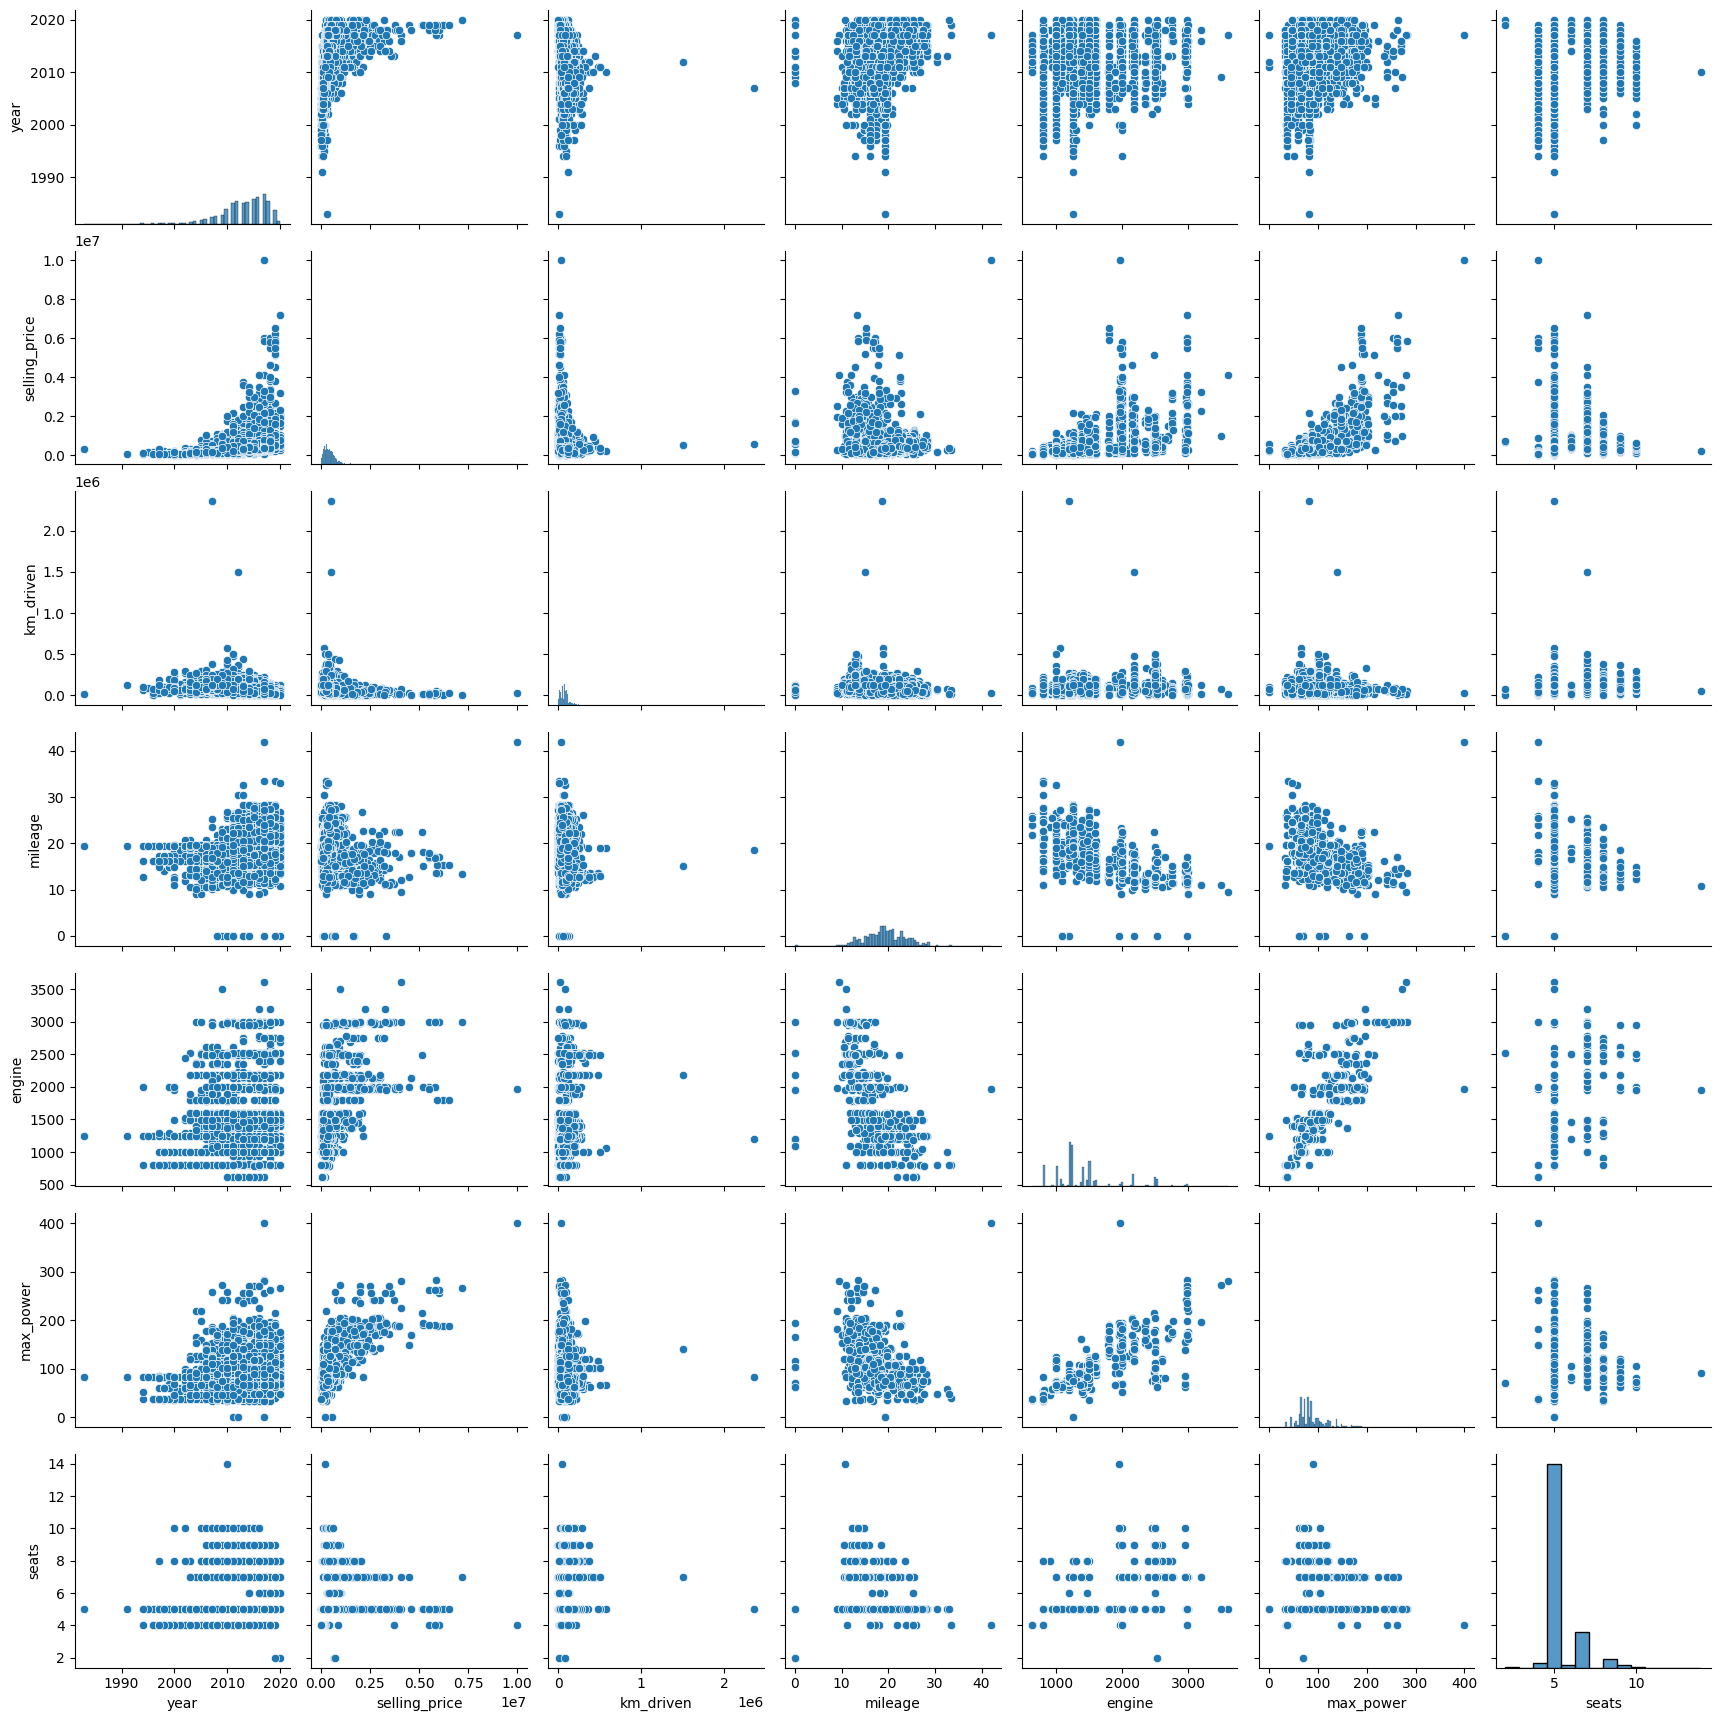

In [30]:
%matplotlib inline
numeric_columns = df_train.select_dtypes(include=['float', 'int']).columns
sns.pairplot(df_train, vars=numeric_columns)
plt.show()

`1. Да, можно предположить связь между features и target переменными. Например, selling_price зависит от переменной year так, что с годами "появления" машины она становится дешевле, соответственно чем новее машина - тем она дороже. Также можно сказать и про km_driven - здесь обратная ситуация: чем больше km наездили до продажи, тем дешевле будет машина. mileage (расход топлива) кажется независимой переменной, так как графики показывают в общем то, что машины имеют некоторое распределение в расходе топлива между собой, и это не сильно коррелирует с целевой переменной. Объем двигателя (engine) и лошадиные силы (max_power) автомобилей тоже имеют связь с целевой переменной в том, что чем больше значение в этих двух колонках (чем мощнее автомобиль), тем он, получается, дороже. Про seats сложно что то сказать, с одной стороны кажется, что ситуация схожа с зависимостью target с колонкой mileage, с другой стороны как будто можно наблюдать, что чем больше сидений у автомобиля, тем дешевле он стоит (но это неточно)`

`
2. Между собой сильно коррелируют признаки max_power и engine, engine и mileage, про остальные сложно сказать по графикам, что коррелирует между собой сильно
`

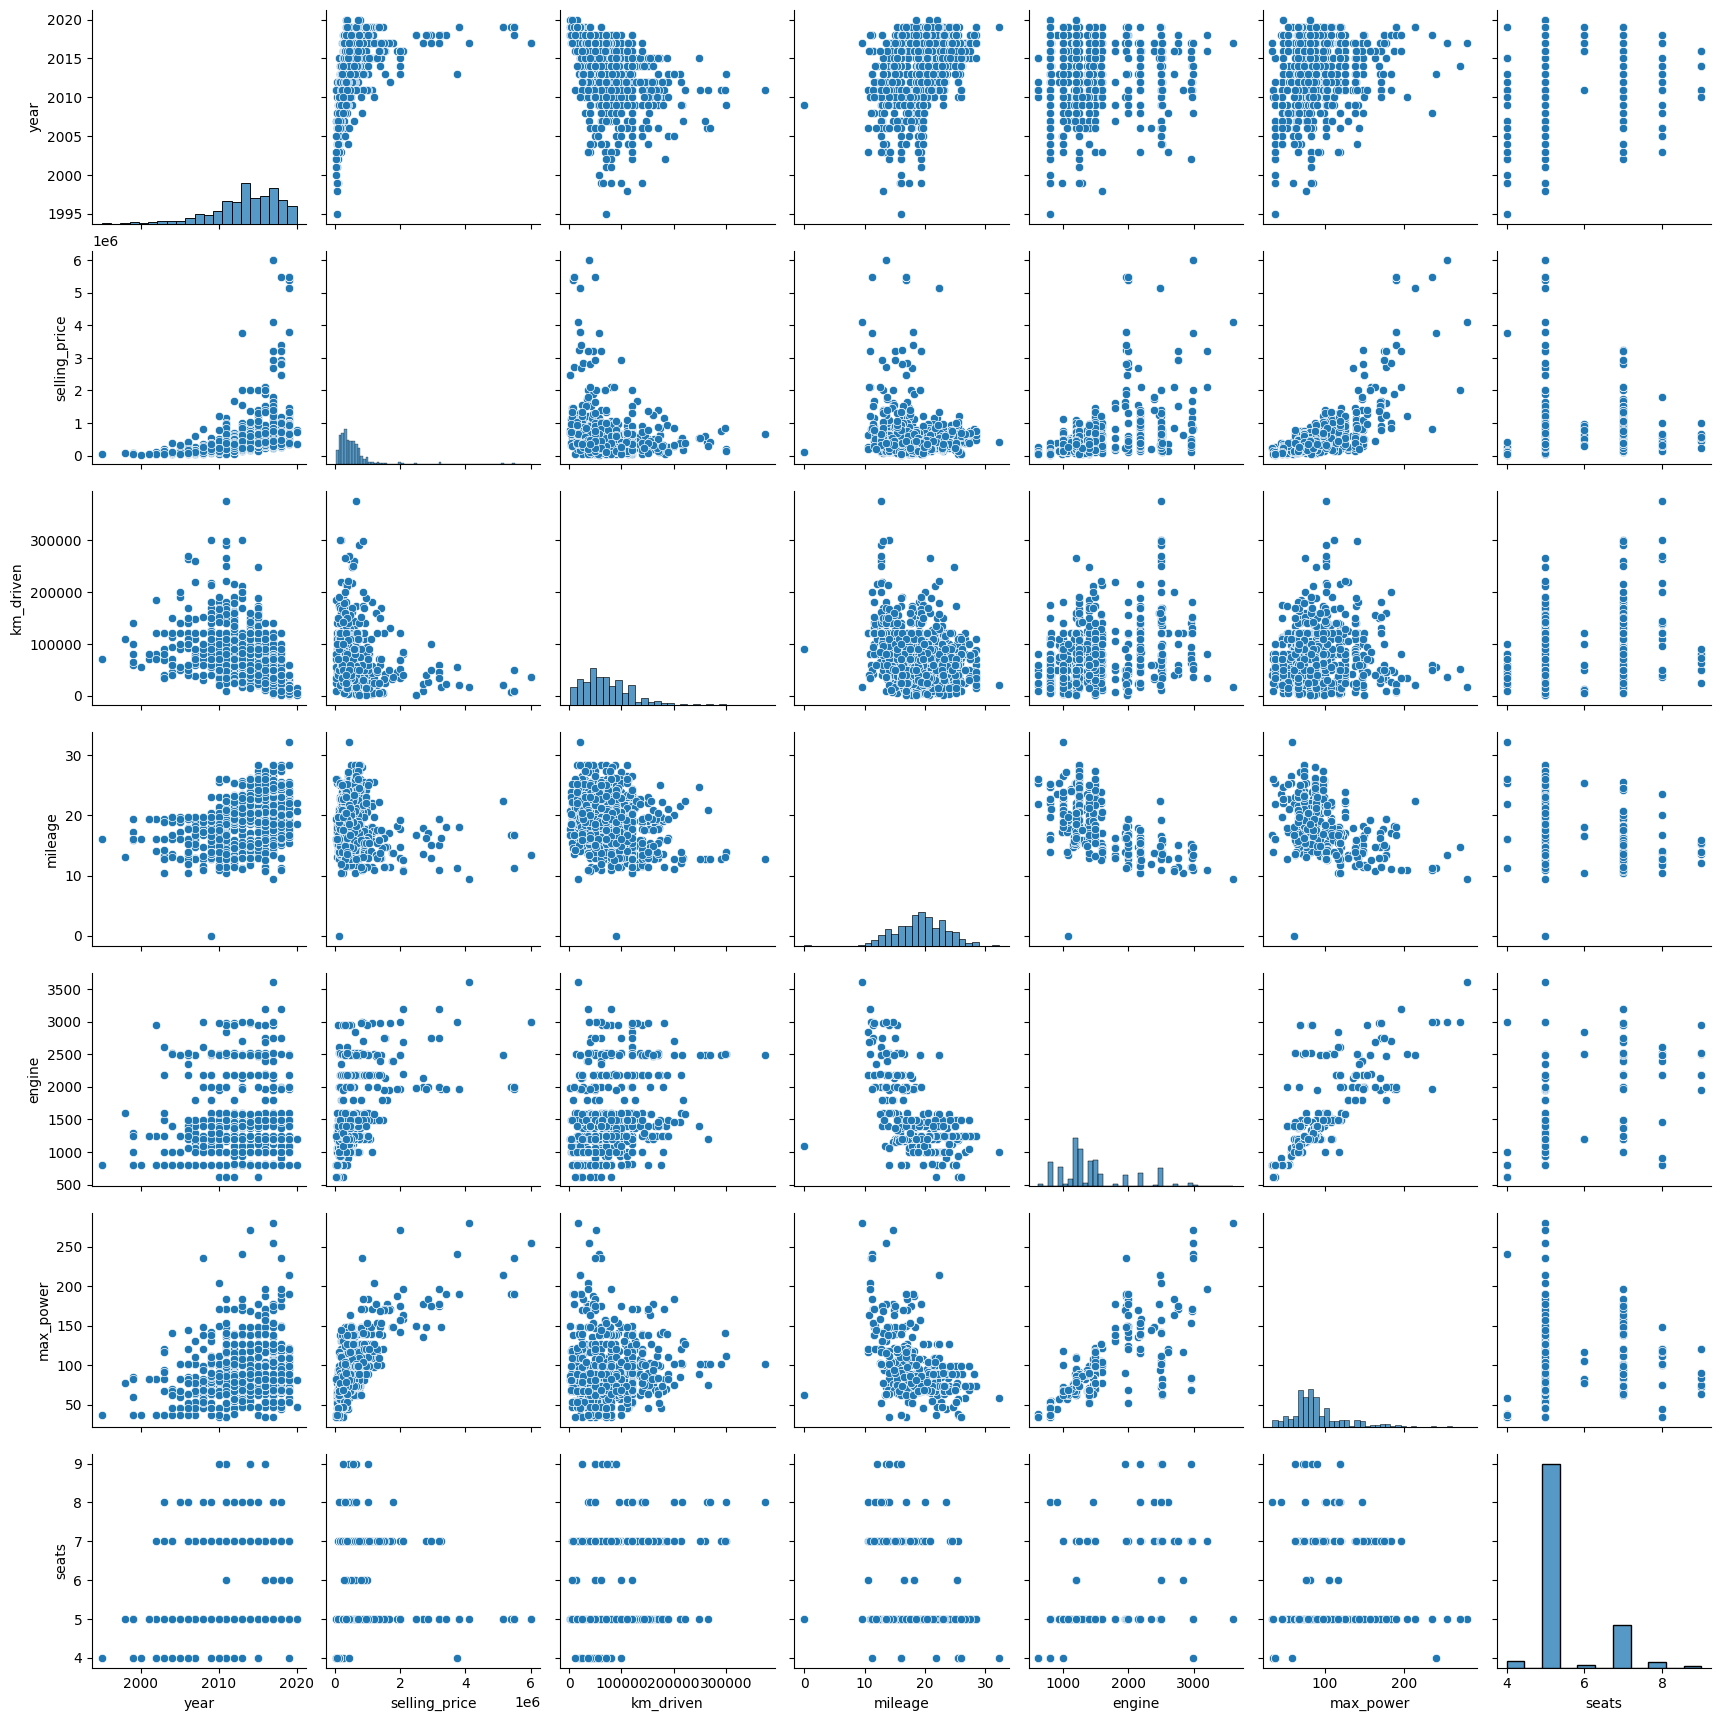

In [31]:
sns.pairplot(df_test, vars=numeric_columns)
plt.show()

`По тестовым данным можно сказать, что наблюдается такая же ситуация в распределении данных, как и в тренировочном датасете. Однако, в силу меньшего количества тестовых данных, наблюдается более четкая структура распределения, так как например в тестовом датасете выбросов на порядок меньше (либо их вовсе нет), от чего графики визуально более информативные.`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


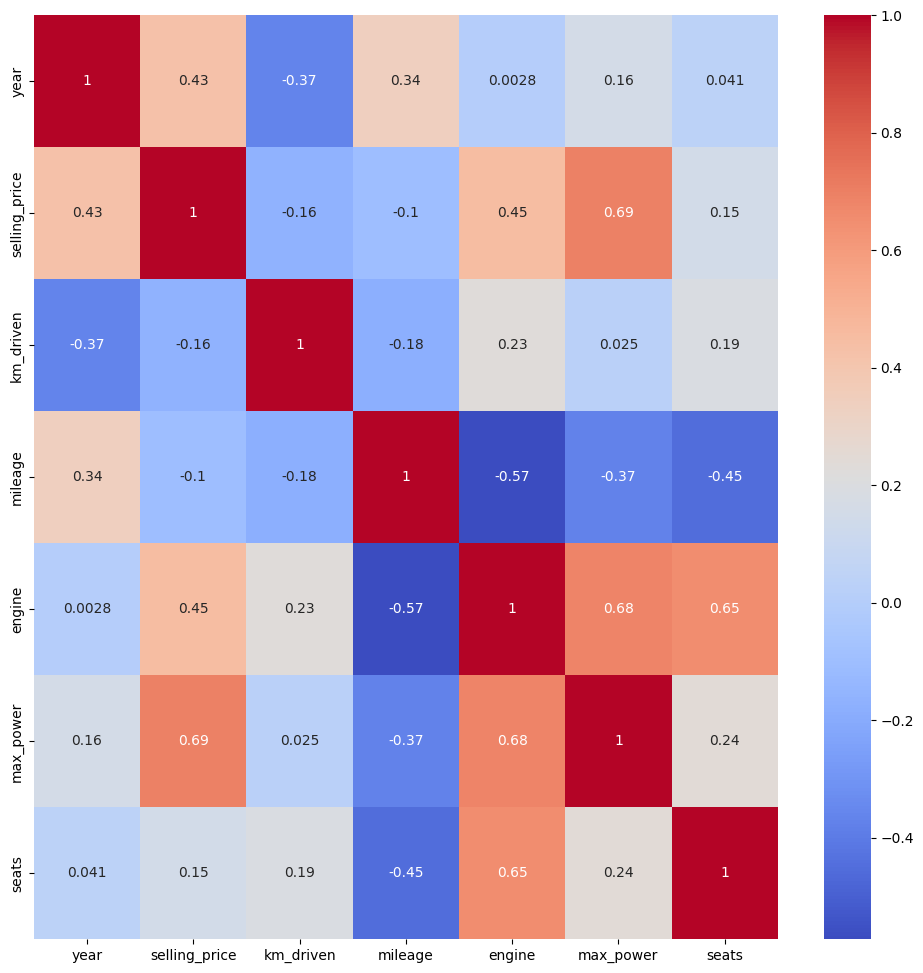

In [32]:
corr_matrix = df_train[numeric_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`1. Наименее скоррелированы между собой признаки: engine и year, max_power и km_driven`

`2. Сильная положительная связь наблюдается у признаков: engine и max_power, а также seats и engine. С целевой переменной наиболее всего коррелирует колонка max_power`

`3. По HeatMap мы конечно наблюдаем умеренно-слабую отрицательную корреляцию между данными колонок year и km_driven, однако, если вспомнить графики распределения в предыдущем пункте, в обоих датасетах можно заметить тенденцию на то, продаваемые автомобили, произведенные в разные года, в большинстве своем имеют пробег менее 100 тыс. км., а в среднем значение пробега распределяется (особенно у тестового датасета) между 100 и 150 тыс. км. (у тренировочного датасета в среднем автомобили имеют пробег менее 100 тыс. км.). Соответственно, утверждать, что чем меньше год, тем больше км проехала машина до продажи для отдельных случаев хоть и имеет место быть, но в большинстве своем это не так - не сильно зависит пробег от года выпуска`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [33]:
cols_to_drop = list(df_train.select_dtypes(object).columns) + ['selling_price']

In [34]:
y_train = df_train['selling_price'].copy()
X_train = df_train.drop(columns=cols_to_drop).copy()

In [35]:
assert X_train.shape == (5840, 6)

In [36]:
y_test = df_test['selling_price'].copy()
X_test = df_test.drop(columns=cols_to_drop).copy()

In [37]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"train R^2: {r2_train}")
print(f"train MSE: {mse_train}")
print(f"test R^2: {r2_test}")
print(f"test MSE: {mse_test}")

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_1 = y_train_pred
y_test_pred_1 = y_test_pred

train R^2: 0.5922591702157293
train MSE: 116874153930.02922
test R^2: 0.5941419681125429
test MSE: 233298786264.12866


In [39]:
# Разницы MSE
abs(mse_train - mse_test)

116424632334.09944

In [40]:
# Разницы R2
abs(r2_train - r2_test)

0.0018827978968136705

**Выводы**:

> Можем наблюдать, что r^2 для test и train выборки имеет схожую точность равной 59%, что говорит нам о том, что модель умеет предсказывать значения с умеренной точностью
> 
> По MSE можем сказать, что при добавлении в модель новых данных ошибка, логично, стала больше, в сравнении с той же метрикой на обучающих данных. В целом, для новых данных возникновение такой разницы кажется нормальным
> 
> Если суммаризировать произошедшее, очевидно, что для модели есть места для улучшения

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Повторение - мать учения
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"train R^2: {r2_train}")
print(f"train MSE: {mse_train}")
print(f"test R^2: {r2_test}")
print(f"test MSE: {mse_test}")

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_2 = y_train_pred
y_test_pred_2 = y_test_pred

train R^2: 0.5922591702157305
train MSE: 116874153930.0289
test R^2: 0.5941419681125579
test MSE: 233298786264.12003


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [42]:
coefficients = model.coef_
most_important_feature = X_train.columns[abs(coefficients).argmax()]

print(f"Наиболее информативный признак: {most_important_feature}")

Наиболее информативный признак: max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"train R^2: {train_r2}")
print(f"train MSE: {train_mse}")
print(f"test R^2: {test_r2}")
print(f"test MSE: {test_mse}")

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_3 = y_train_pred
y_test_pred_3 = y_test_pred

train R^2: 0.5922591701804456
train MSE: 116874153940.1429
test R^2: 0.5941407998542256
test MSE: 233299457812.36975


In [44]:
coefficients = lasso.coef_

zero_coeffs = sum(coefficients == 0)
non_zero_coeffs = len(coefficients) - zero_coeffs

print(f"Количество зануленных коэффициентов: {zero_coeffs}")
print(f"Количество ненулевых коэффициентов: {non_zero_coeffs}")
print(f"Признаки с ненулевыми коэффициентами: {list(X_train.columns[coefficients != 0])}")

Количество зануленных коэффициентов: 0
Количество ненулевых коэффициентов: 6
Признаки с ненулевыми коэффициентами: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


>Как выяснилось, ни один признак L1-регуляризация не занулила, а значит Lasso посчитала важными все 6 признаков для обучения 

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [45]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = {'alpha': np.logspace(-6, 6, 100)}

grid_search = GridSearchCV(lasso, param_grid, cv=10, n_jobs=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Метрики:\ntrain R^2: {train_r2}")
print(f"train MSE: {train_mse}")
print(f"test R^2: {test_r2}")
print(f"test MSE: {test_mse}")


print("\nОтветы на вопросы:\n1. Количество обученных моделей:", grid_search.n_splits_ * len(param_grid['alpha']))
print("\n2. Лучший коэффициент регуляризации:", grid_search.best_params_)
print(f"\n3. Зануленные веса коэффициентов (в количестве {(grid_search.best_estimator_.coef_ == 0).sum()}):", list(X_train.columns[grid_search.best_estimator_.coef_ == 0]))

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_4 = y_train_pred
y_test_pred_4 = y_test_pred

Метрики:
train R^2: 0.5826020856037113
train MSE: 119642244616.59955
test R^2: 0.5645259550339512
test MSE: 250322916285.8648

Ответы на вопросы:
1. Количество обученных моделей: 1000

2. Лучший коэффициент регуляризации: {'alpha': 26560.87782946684}

3. Зануленные веса коэффициентов (в количестве 3): ['mileage', 'engine', 'seats']


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [46]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
param_grid = {
    'alpha': np.logspace(-6, 6, 200),
    'l1_ratio': np.linspace(0.1, 1 , 33)
}

grid_search = GridSearchCV(elasticnet, param_grid, cv=10, n_jobs=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Метрики:\ntrain R^2: {train_r2}")
print(f"train MSE: {train_mse}")
print(f"test R^2: {test_r2}")
print(f"test MSE: {test_mse}")

print("\nОтветы на вопросы:\n1. Количество обученных моделей:", grid_search.n_splits_ * len(param_grid['alpha']) * len(param_grid['l1_ratio']))
print("\n2. Лучшие гиперпараметры:", grid_search.best_params_)

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_5 = y_train_pred
y_test_pred_5 = y_test_pred

Метрики:
train R^2: 0.5850206215904634
train MSE: 118948999480.0982
test R^2: 0.562751009870453
test MSE: 251343205450.53592

Ответы на вопросы:
1. Количество обученных моделей: 66000

2. Лучшие гиперпараметры: {'alpha': 0.46595256686646774, 'l1_ratio': 0.690625}


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [47]:
print('Изначальное количество уникальных значений в колонке NAME:', len(list(df_train['name'].unique())))

Изначальное количество уникальных значений в колонке NAME: 1924


In [48]:
df_train['name'].head()

0           Maruti Swift Dzire VDI
1     Skoda Rapid 1.5 TDI Ambition
2        Hyundai i20 Sportz Diesel
3           Maruti Swift VXI BSIII
4    Hyundai Xcent 1.2 VTVT E Plus
Name: name, dtype: object

>Вместо удаления, можно заметить, что в целом важными в названии машин будут являться первые слова - `бренд` автомобиля. Все остальное - какие то приписки, показывающие уникальную комплектацию автомобилей, от этого всего уникальных значений 1924. Однако, можем попробовать реализовать в этой колонке процесс обработки, которое из названий автомобилей оставляет только первые слова (бренд автомобиля), которые уже можно будет категоризировать

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [49]:
def get_first_word(name):
    words = name.split()[:1]
    return ' '.join(words)

print('Посчитаем, сколько уникальных значений осталось после обработки:', len(list(df_train['name'].apply(get_first_word).unique())))

Посчитаем, сколько уникальных значений осталось после обработки: 30


In [50]:
X_train_cat = df_train.drop(columns=['selling_price']).copy()
X_train_cat['name'] = X_train_cat['name'].apply(get_first_word)

In [51]:
assert X_train_cat.shape == (5840, 11)

>Поменял количество колонок с 10 на 11, так как в этом задании я отказался удалять колонку `name` и решил ее оставить

In [52]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [53]:
# Применим к тесту
X_test_cat = df_test.drop(columns=['selling_price']).copy()
X_test_cat['name'] = X_test_cat['name'].apply(get_first_word)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [54]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cats = list(X_train_cat.select_dtypes(include=['object']).columns) + ['seats']

X_train_cat_ohe = pd.get_dummies(X_train_cat, columns=cats, drop_first=True)

In [55]:
X_test_cat_ohe = pd.get_dummies(X_test_cat, columns=cats, drop_first=True)

In [56]:
# В обоих датасетах есть колонки, существующие в одном и отсутствующие в другом
# Это недоразумение надо исправить, иначе модель не взлетит
unmatched_cols_X_test = list(set(X_train_cat_ohe.columns)-set(X_test_cat_ohe.columns))
unmatched_cols_X_train = list(set(X_test_cat_ohe.columns)-set(X_train_cat_ohe.columns))

# Добавленные отсутствующие колонки надо занулить
for col in unmatched_cols_X_test:
    X_test_cat_ohe[col] = 0
for col in unmatched_cols_X_train:
    X_train_cat_ohe[col] = 0

# Стабилизируем порядок колонок, а то модель будет ругаться
X_test_cat_ohe = X_test_cat_ohe[X_train_cat_ohe.columns]

# Проверка
assert len(X_test_cat_ohe.columns) == len(X_train_cat_ohe.columns)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [57]:
import warnings
from scipy.linalg import LinAlgWarning

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Могут возникать разные предупреждения от sklearn, предпочтем их не видеть (они засоряют Output)
warnings.filterwarnings(action='ignore', category=LinAlgWarning)

ridge_model = Ridge()

param_grid = {'alpha': np.logspace(-6, 6, 200)}

grid_search = GridSearchCV(ridge_model, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(X_train_cat_ohe, y_train)

y_train_pred = grid_search.best_estimator_.predict(X_train_cat_ohe)
y_test_pred = grid_search.best_estimator_.predict(X_test_cat_ohe)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Метрики:\ntrain R^2: {train_r2}")
print(f"train MSE: {train_mse}")
print(f"test R^2: {test_r2}")
print(f"test MSE: {test_mse}")

best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

print(f"\nОтветы на вопросы:\nЛучший параметр alpha: {best_alpha}")
print(f"Лучшее значение R^2 на обучающих данных: {best_r2}")

# Запоминаем предсказания для дальнейшей бизнес-метрики
y_train_pred_6 = y_train_pred
y_test_pred_6 = y_test_pred

Метрики:
train R^2: 0.766147521040442
train MSE: 67031085989.84034
test R^2: 0.771904116062634
test MSE: 131116027510.79034

Ответы на вопросы:
Лучший параметр alpha: 2.1461411978584013
Лучшее значение R^2 на обучающих данных: 0.7111824281164999


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [58]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_true - y_pred) / y_true
    successful_predictions = relative_error <= 0.1
    return np.mean(successful_predictions)

In [59]:
# Посчитаем метрику качества предсказаний для всех моделей этой домашки
models = ["Модель 1 (LinearRegression_not_scaled)", "Модель 2 (LinearRegression_scaled)", "Модель 3 (Lasso_base)", "Модель 4 (Lasso_GSCV)", "Модель 5 (ElasticNet_GSCV)", "Модель 6 (Ridge_GSCV)"]
predictions_train = [y_train_pred_1, y_train_pred_2, y_train_pred_3, y_train_pred_4, y_train_pred_5, y_train_pred_6]
predictions_test = [y_test_pred_1, y_test_pred_2, y_test_pred_3, y_test_pred_4, y_test_pred_5, y_test_pred_6]

print("Качество работ моделей на обучающих и тестовых данных:")
print("\n--------- Успешность предсказаний моделей на обучающей выборке ---------\n")
for i, model in enumerate(models):
    business_metric_train = business_metric(y_train, predictions_train[i])
    print(f"{model}: {business_metric_train:.2%}")

print("\n--------- Успешность предсказаний моделей на тестовой выборке ---------\n")
for i, model in enumerate(models):
    business_metric_test = business_metric(y_test, predictions_test[i])
    print(f"{model}: {business_metric_test:.2%}")

Качество работ моделей на обучающих и тестовых данных:

--------- Успешность предсказаний моделей на обучающей выборке ---------

Модель 1 (LinearRegression_not_scaled): 21.52%
Модель 2 (LinearRegression_scaled): 21.52%
Модель 3 (Lasso_base): 21.52%
Модель 4 (Lasso_GSCV): 20.60%
Модель 5 (ElasticNet_GSCV): 22.36%
Модель 6 (Ridge_GSCV): 26.71%

--------- Успешность предсказаний моделей на тестовой выборке ---------

Модель 1 (LinearRegression_not_scaled): 22.70%
Модель 2 (LinearRegression_scaled): 22.70%
Модель 3 (Lasso_base): 22.70%
Модель 4 (Lasso_GSCV): 23.30%
Модель 5 (ElasticNet_GSCV): 24.30%
Модель 6 (Ridge_GSCV): 30.30%


**Выводы по моделям**:


>Судя по бизнес метрикам, модель Ridge, обучившаяся последней, оказалась лучшей. 

>Интересно отметить, что доля успешных предсказаний на тестовой выборке оказалась выше, чем на обучающей. 

>Вероятно, это связано с тем, что тестовая выборка меньше по размеру, а модель хорошо обобщает на новых данных, не подстраиваясь под шум. Также стоит добавить, что кастомная метрика сама по себе более “мягкая”, чем метрики, используемые при обучении до этого: MSE или r^2. Бизнес-метрика просто-напросто фиксирует, соответствует ли предсказание реальному значению (с погрешностью в пределах 10%) и игнорирует саму разницу внутри этого диапазона. Это всё возможно и объясняет, почему доля успешных предсказаний может быть выше в тестовых данных.

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

